In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import networkx as nx
import scipy.stats as stats
import math
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [263]:
globalNumber = 500
clusterNumber = 5

# input cost vector to be visualzed
with open("global_cost_vectors_500_lRand.pk",'rb') as f:
    global_cost = pickle.load(f)
with open("global_trips_500_lRand.pk",'rb') as f:
    global_dict = pickle.load(f)
# with open("global_trips.pk",'rb') as f:
#     global_dict = pickle.load(f)
with open("local_cost_vectors.pk",'rb') as f:
    local_cost = pickle.load(f)

In [264]:
global_dict

{'l1': [4840761,
  5253200,
  4829347,
  4830487,
  4819524,
  5064819,
  4819523,
  5422279,
  5372925,
  5253202,
  5098692,
  5098691,
  4841260,
  5064246,
  5049326,
  4830580,
  5098599,
  4819527,
  4819537,
  4819977,
  4819969,
  4848816,
  4819515,
  4829354,
  5016358,
  5064459,
  4848814,
  4819929,
  4840832,
  5372934,
  4823763,
  4848812,
  5147024,
  4884665,
  4884663,
  4840570,
  5422280,
  4840590,
  5139948,
  4848830,
  4844399,
  4841251,
  4840608,
  4840591,
  4840537,
  4840536,
  5036721,
  5036720,
  4819875,
  4841262,
  4819528,
  4819532,
  4819530,
  4829338,
  4819534,
  4819837,
  4830581,
  4840611,
  4840612,
  4819972,
  4819976,
  4840532,
  4840525,
  4819536,
  5147025,
  4841769,
  4848831],
 'l2': [4840761,
  5253200,
  4829347,
  4830487,
  4819524,
  4819523,
  5422279,
  5372925,
  5253202,
  5098692,
  5098691,
  4841260,
  5064246,
  5098599,
  4819527,
  4819537,
  4819977,
  4819969,
  4848816,
  4819515,
  4829354,
  4848814,
  484083

# Visualize with original data (2 factors : time and risk)

In [265]:
global_cost_list = []
time_list = []
risk_list = []

for k in global_cost:
    time_list.append(global_cost[k][0][0])
    risk_list.append(global_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
global_time_normalized = []
global_risk_normalized = []
for k in global_cost:
    temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    global_time_normalized.append((global_cost[k][0][0]-avgTime)/stdTime)
    global_risk_normalized.append((global_cost[k][0][1]-avgRisk)/stdRisk)
    global_cost_list.append(temp)
    


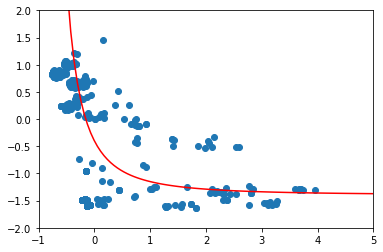

In [216]:
plt.scatter(global_time_normalized, global_risk_normalized)

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
#y = 1/(x+1.2)**2 -1.6
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

In [261]:
def func(x,y):
    return 1/(x+1)**2 -1.4 -y
greenX = []
greenY = []
#global_cost_list = []
greenLoop = [] # stores the loop number

blueX = []
blueY =[]
for i in range(len(global_time_normalized)):
    if True:
    #if func(global_time_normalized[i],global_risk_normalized[i]) >= 0:
        greenX.append(global_time_normalized[i])
        greenY.append(global_risk_normalized[i])
        global_cost_list.append((global_time_normalized[i],global_risk_normalized[i]))
        greenLoop.append(i+1)
    else:
        blueX.append(global_time_normalized[i])
        blueY.append(global_risk_normalized[i])
        

In [262]:
len(greenX)

500

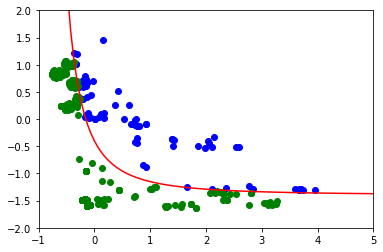

In [232]:
plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY,c ='g')

# 100 linearly spaced numbers
x = np.linspace(-0.9,5,100)
# the function, which is y = x^2 here
y = 1/(x+1)**2 -1.4
plt.ylim([-2, 2])
plt.xlim([-1, 5])
plt.plot(x,y, 'r')
plt.show()

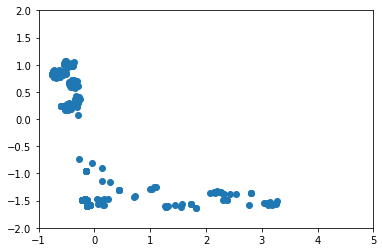

In [233]:
#plt.scatter(blueX, blueY,c ='b')
plt.scatter(greenX, greenY)


plt.ylim([-2, 2])
plt.xlim([-1, 5])
#plt.plot(x,y, 'r')
plt.show()

In [234]:
greenLoop

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 40,
 43,
 44,
 45,
 50,
 57,
 59,
 60,
 65,
 67,
 69,
 71,
 72,
 74,
 78,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 190,
 191,
 192,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 212,
 213,
 214,
 215,
 216,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 23

In [235]:
local_cost_list = []
time_list = []
risk_list = []

for k in local_cost:
    time_list.append(local_cost[k][0][0])
    risk_list.append(local_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
local_time_normalized = []
local_risk_normalized = []
for k in local_cost:
    #temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    local_time_normalized.append((local_cost[k][0][0]-avgTime)/stdTime)
    local_risk_normalized.append((local_cost[k][0][1]-avgRisk)/stdRisk)
    local_cost_list.append(temp)

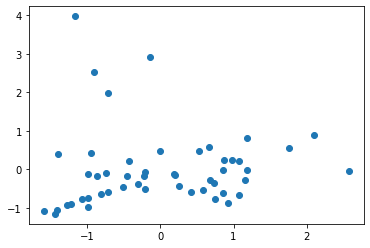

In [236]:
plt.scatter(local_time_normalized, local_risk_normalized)
plt.show()

# Visualize with ratio data (2 factors : time and risk)

In [266]:
global_ratio_list = []
ratio_list = []

for k in global_cost:
    ratio_list.append((global_cost[k][0][0]/global_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
global_Ratio_normalized = []
for e in ratio_list:
    global_ratio_list.append((e-avgRatio)/stdRatio)
    

(array([  0.,   0.,   0.,   0.,   0., 314.,  24.,  21.,   2.,   0.,   9.,
          3.,  70.,  13.,   0.,  20.,   3.,   4.,   3.,   7.,   2.,   3.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,
         4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,
         7.  ]),
 <BarContainer object of 36 artists>)

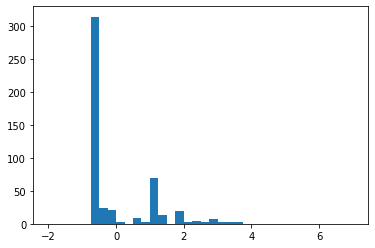

In [267]:
bins = [-2]
for i in range(36):
    bins.append(bins[-1]+0.25)
    
#temp = [global_ratio_list[i] for i in range(500) if kmeans.labels_[i]==0]
    
plt.hist(global_ratio_list,bins=bins)

In [268]:
local_ratio_list = []
ratio_list = []

for k in local_cost:
    ratio_list.append((local_cost[k][0][0]/local_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
local_Ratio_normalized = []
for e in ratio_list:
    local_ratio_list.append((e-avgRatio)/stdRatio)

(array([ 2.,  4.,  3.,  9., 11.,  3.,  3.,  2.,  1.,  2.,  2.,  1.,  0.,
         1.]),
 array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25]),
 <BarContainer object of 14 artists>)

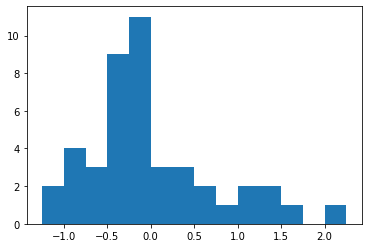

In [269]:
bins = [-1.25]
for i in range(14):
    bins.append(bins[-1]+0.25)
    
plt.hist(local_ratio_list,bins=bins)

# K means clustering based on the original features

In [270]:
kmeans = KMeans(
    init="random",
    n_clusters=clusterNumber,
    n_init=10,
    max_iter=300,
    random_state=42
)


In [271]:
kmeans.fit(global_cost_list)

KMeans(init='random', n_clusters=5, random_state=42)

In [272]:
color_labels = kmeans.labels_

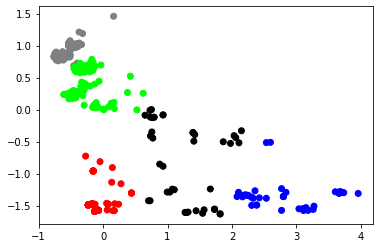

In [273]:
color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
color_list = []
for ind in range(len(greenX)):
    color_list.append(color[color_labels[ind]])
    
plt.scatter(greenX, greenY,c=color_list)
#plt.show()

ValueError: 'c' argument has 250 elements, which is inconsistent with 'x' and 'y' with size 500.

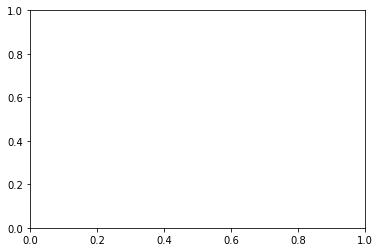

In [207]:
color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
color_list = []
for ind in range(len(global_cost_list)):
    color_list.append(color[color_labels[ind]])
    
plt.scatter(global_time_normalized, global_risk_normalized,c=color_list)
#plt.show()

In [274]:
color_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 1, 4,
       4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,

In [275]:
len(color_labels)

500

# PageRank Implementation

In [276]:
idToRoad =  []
with open("../turning_network_linkID_updated.csv",'r') as f:
    idToRoad = csv.reader(f)
    idToRoad = list(idToRoad)
    
idToRoadDict = {}
roadToIdDict ={}
for element in idToRoad:
    idToRoadDict[element[0]] = (element[1],element[2])
    if "intersection" not in element[0]:
        roadToIdDict[element[1].split('_')[0],element[2].split('_')[0]] = element[0]
#
print(roadToIdDict)    

{('1665118', '1665116'): '4843594', ('1665116', '1665118'): '4822208', ('1667021', '1667020'): '4845785', ('1667020', '1667021'): '4824399', ('1662942', '1662961'): '4841477', ('1662961', '1662942'): '4820091', ('1667085', '1666947'): '4848810', ('1666947', '1667085'): '4827425', ('1662308', '1662230'): '4840888', ('1662230', '1662308'): '4819502', ('1662155', '1662074'): '4830446', ('1662074', '1662155'): '4851831', ('2290840', '2290839'): '5488967', ('2290839', '2290840'): '5488968', ('1663866', '2020753'): '5077172', ('2020753', '1663866'): '5077173', ('2012370', '2012373'): '5038732', ('2012373', '2012370'): '5038733', ('1666025', '1665735'): '4850758', ('1665735', '1666025'): '4829373', ('2312958', '2182350'): '5516766', ('1666923', '1667020'): '4845784', ('1667020', '1666923'): '4824398', ('1662121', '1662120'): '4829548', ('1662120', '1662121'): '4850933', ('2020744', '1662942'): '5077161', ('1662942', '2020744'): '5077160', ('1662066', '1661965'): '4819324', ('1661965', '166206

In [248]:
# 8/3
global_trip_grouped = {}
for i in range(clusterNumber):
    global_trip_grouped[i] = []
    
for i in range(len(greenLoop)):
    key = "l" + str(greenLoop[i])
    global_trip_grouped[color_labels[i]].append(global_dict[key])


In [277]:
global_trip_grouped = {}
for i in range(clusterNumber):
    global_trip_grouped[i] = []
    
for i in range(1,globalNumber+1):
    key = "l" + str(i)
    global_trip_grouped[color_labels[i-1]].append(global_dict[key])

In [149]:
def pageRank(trips, origin = '1666494', destination = '1662728'): # input a bunch of trips, return a recommendation for route
    dualArcs = {} # store the arcs for dual graph
    originalG = nx.DiGraph()
    #print(len(trips))
    for t in trips:
        subG = nx.DiGraph()
        arcList = []
        for road in t:
            startNode = idToRoadDict[str(road)][0].split('_')[0]
            endNode = idToRoadDict[str(road)][1].split('_')[0]
            arcList.append((startNode,endNode))
        subG.add_edges_from(arcList)
        
        # find the path to be added to construct dual graph
        path = nx.shortest_path(subG, origin, destination)
        
        for ind in range(len(path)-2):
            #print((path[ind],path[ind + 1]))
            originalG.add_edges_from([(path[ind],path[ind + 1])])
            current_arc = path[ind]+'_to_'+path[ind + 1]
            next_arc = path[ind + 1]+'_to_'+path[ind + 2]
            if ind == 0:
                if not (path[0] in dualArcs):
                    dualArcs[path[0]] = {current_arc : 1}
                else:
                    if not(current_arc in dualArcs[path[0]]):
                        dualArcs[path[0]][current_arc] = 1
                    else:
                        dualArcs[path[0]][current_arc] += 1
            
            if not (current_arc in dualArcs):
                dualArcs[current_arc] = {next_arc : 1}
            else:
                if not (next_arc in dualArcs[current_arc]):
                    dualArcs[current_arc][next_arc] = 1
                else:
                    dualArcs[current_arc][next_arc] += 1

        last_arc = path[-2]+'_to_'+path[-1]
        originalG.add_edges_from([(path[-2],path[-1])])
        if not (last_arc in dualArcs):
                dualArcs[last_arc] = {path[-1] : 1}
        else:
            if not (path[-1] in dualArcs[last_arc]):
                dualArcs[last_arc][path[-1]] = 1
            else:
                dualArcs[last_arc][path[-1]] += 1
                
    for key in dualArcs:
        sumCount = 0
        for key2 in dualArcs[key]:
            sumCount += dualArcs[key][key2]
            
        for key2 in dualArcs[key]:
            dualArcs[key][key2] /= sumCount
        
    dualG = nx.DiGraph()
    
    dualArcList = []
    for key in dualArcs:
        for key2 in dualArcs[key]:
            dualArcList.append((key,key2,{'weight':dualArcs[key][key2]}))
            
    dualG.add_edges_from(dualArcList)
    dualG.add_edges_from([(destination,origin,{'weight':1})])
    #record pageRank result
    result = nx.pagerank(dualG, weight='weight', alpha=0.9)
    
    weightNode = {}
    for k in result:
        if '_to_' in k:
            startNode = k.split('_to_')[0]
            endNode = k.split('_to_')[1]
            #print(startNode,endNode)
            originalG[startNode][endNode]['weight'] = np.log(1/result[k])
            weightNode[(startNode,endNode)] = np.log(1/result[k])
    def returnWeight(start,end,weight):
        
        return weight['weight']
            
    optimalPath = nx.shortest_path(originalG,source=origin,target=destination,weight=returnWeight)
    print(originalG['1666494'])
    return optimalPath
        
        
        

In [249]:
group_optimal_path = []
for g in range(clusterNumber):
    group_optimal_path.append(pageRank(global_trip_grouped[g]))

{'1666490': {'weight': 4.453694743291688}}
{'1666490': {'weight': 4.566116652325597}}
{'1666498': {'weight': 4.315230082793988}, '1666490': {'weight': 5.205371226153541}}
{'1666490': {'weight': 6.527796128289148}, '1666498': {'weight': 4.39301638167257}}
{'1666490': {'weight': 4.810570536248992}, '1666498': {'weight': 5.340245993857245}}


In [278]:
group_optimal_path2 = []
for g in range(clusterNumber):
    group_optimal_path2.append(pageRank(global_trip_grouped[g]))

{'1666498': {'weight': 4.491826002883428}, '1666490': {'weight': 5.3163433047640245}}
{'1666490': {'weight': 4.810570536248992}, '1666498': {'weight': 5.340245993857245}}
{'1666490': {'weight': 6.526880502094403}, '1666498': {'weight': 4.470418884290265}}
{'1666490': {'weight': 4.586438819555575}}
{'1666490': {'weight': 5.01650329519486}, '1666498': {'weight': 5.628170917833469}}


In [ ]:
group_otpimal[]

In [282]:
group_optimal_path2[1] == group_optimal_path[4]

True

In [211]:
with open("group_5_optimal_path_L_filtered_2.pk", 'wb') as f:
    pickle.dump(group_optimal_path,f)

In [56]:
group_optimal_path

[['1666494',
  '1666498',
  '1666500',
  '1666504',
  '1666512',
  '1666025',
  '1665735',
  '1665120',
  '1664738',
  '1664487',
  '1663739',
  '1663569',
  '10698',
  '10695',
  '10691',
  '1663401',
  '1663394',
  '1663378',
  '2176343',
  '2290881',
  '2176384',
  '2290840',
  '2290837',
  '2176407',
  '15381',
  '1663319',
  '1663314',
  '1663301',
  '1663224',
  '1663218',
  '1663149',
  '1663079',
  '1663076',
  '1663078',
  '1663081',
  '1663072',
  '1663083',
  '1663090',
  '1663059',
  '1662887',
  '1662813',
  '1662751',
  '1662704',
  '1662749',
  '1662738',
  '1662728'],
 ['1666494',
  '1666490',
  '1666480',
  '1666485',
  '1665861',
  '1665153',
  '1664722',
  '1663343',
  '1663366',
  '10668',
  '1663464',
  '2059734',
  '1662404',
  '1662403',
  '1662400',
  '1662395',
  '1679462',
  '1662388',
  '1662386',
  '1662382',
  '1662381',
  '2011721',
  '1662372',
  '1662357',
  '2180752',
  '2182350',
  '1662349',
  '10523',
  '1662358',
  '1662394',
  '1662465',
  '1662509

# construct the preference ratio distribution of the groups

In [250]:
ratioDict = {}
for g in range(clusterNumber):
    ratioDict[g] = []
    
for idx in range(1,globalNumber+1):
    k = 'l' + str(idx)
    ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][0]/global_cost[k][0][1]) 
    #ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][1]/global_cost[k][0][0]) 
    

IndexError: index 408 is out of bounds for axis 0 with size 408

In [251]:
ratioDict = {}
for g in range(clusterNumber):
    ratioDict[g] = []
    
for idx in range(len(greenLoop)):
    k = 'l' + str(greenLoop[idx])
    ratioDict[kmeans.labels_[idx]].append(global_cost[k][0][0]/global_cost[k][0][1]) 
    #ratioDict[kmeans.labels_[idx-1]].append(global_cost[k][0][1]/global_cost[k][0][0])



In [252]:
normalDistribution = {}

for g in range(clusterNumber):
    normalDistribution[g] =  {'mean': np.mean(ratioDict[g]) , 'std':np.std(ratioDict[g]) }

In [253]:
normalDistribution

{0: {'mean': 0.8521200187041543, 'std': 0.29028842433598795},
 1: {'mean': 0.7677075580158581, 'std': 0.22760218919491937},
 2: {'mean': 0.06430046345963694, 'std': 0.0011029695456707613},
 3: {'mean': 0.07963292940959545, 'std': 0.0065167645602926},
 4: {'mean': 0.5353859694989597, 'std': 0.1570529671337399}}

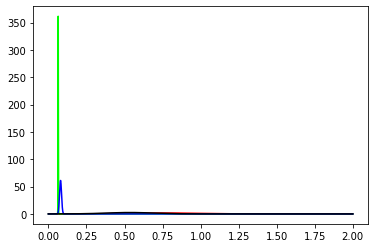

In [254]:
x_axis = np.arange(0, 2, 0.0001)

for g in range(clusterNumber):
    if g == 0 :
        continue
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])
plt.show()

# construct the preference ratio distribution for the user

In [255]:
ratioLocal = []
    
for idx in range(1,51):
    k = 'l'+str(idx)
    ratioLocal.append(local_cost[k][0][0]/local_cost[k][0][1])

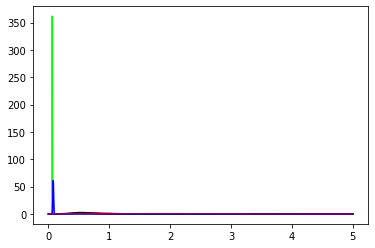

In [256]:
x_axis = np.arange(0, 5, 0.0001)

for g in range(5):
    if g ==0 :
        continue
    plt.plot(x_axis, stats.norm.pdf(x_axis, normalDistribution[g]['mean'], normalDistribution[g]['std']),c=color[g])

plt.plot(x_axis, stats.norm.pdf(x_axis,np.mean(ratioLocal),np.std(ratioLocal)),c='purple')
    
plt.show()

# Calculate KL-divergence

In [257]:
def KLDivergence(mean1,std1,mean2,std2):
    
    return np.log(std2/std1) + (std1**2 + (mean1-mean2)**2)/(2*std2**2) - 1/2

In [258]:
for g in range(clusterNumber):
    print('KL(group{},user) : {}'.format(g, KLDivergence(np.mean(ratioLocal),
                                                         np.std(ratioLocal), 
                                                         normalDistribution[g]['mean'], 
                                                         normalDistribution[g]['std'])
                                        ))
    

KL(group0,user) : 5.0374199136854685
KL(group1,user) : 9.95448777228503
KL(group2,user) : 1079434.798844151
KL(group3,user) : 30432.512744788943
KL(group4,user) : 29.758269488971784
